In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

# Hierarchical Clustering with Python and Scikit-Learn

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar. 


There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this notebook we will focus on  clustering that involves the bottom-up approach.


Steps to Perform Hierarchical Clustering
Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.


There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

1. Measure the distance between the closes points of two clusters.
2. Measure the distance between the farthest points of two clusters.
3. Measure the distance between the centroids of two clusters.
4. Measure the distance between all possible combination of points between the two clusters and take the mean.


## Toy Example

X here is a $N\times 2$ Matrix. 

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

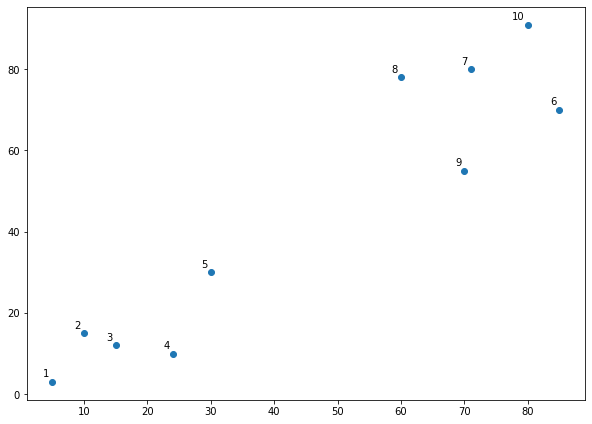

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

Let's name the above plot as Graph1. It can be seen from the naked eye that the data points form two clusters: first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

However, in the real world, we may have thousands of data points in many more than 2 dimensions. In that case it would not be possible to spot clusters with the naked eye. This is why clustering algorithms have been developed.

Coming back to use of dendrograms in hierarchical clustering, let's draw the dendrograms for our data points. We will use the scipy library for that purpose. Execute the following script:

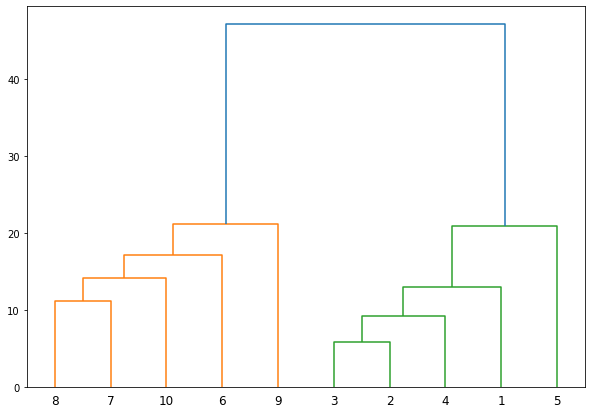

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph1, we can see that points 2 and 3 are closest to each other while points 7 and 8 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph2, you can see that the dendograms have been created joining points 2 with 3, and 8 with 7. The vertical height of the dendogram shows the Euclidean distances between points. From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than the distance between point 2 and 3.

The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph1, point 4 is closest to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 with dendrogram of point 2 and 3. This process continues until all the points are joined together to form one big cluster.

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. Take a look at the following plot:

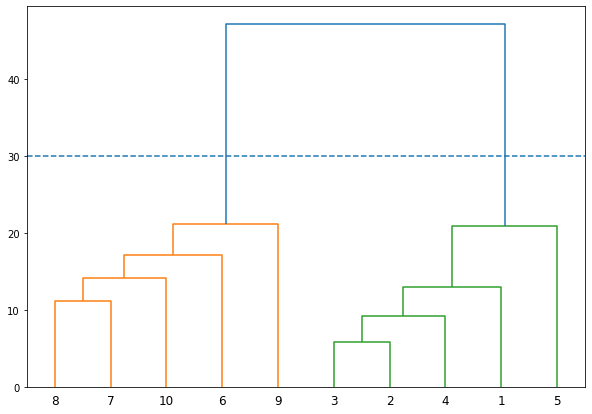

In [5]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.hlines(y= 30, xmin =0, xmax = 100, linestyles='dashed')
plt.show()

We can see that the largest vertical distance without any horizontal line passing through it is represented by blue line. So we draw a new horizontal dashed line that passes through the blue line. Since it crosses the blue line at two points, therefore the number of clusters will be 2.

Basically the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. If we draw a line further down, the threshold required to be a new cluster will be decreased and more clusters will be formed as see in the image below:

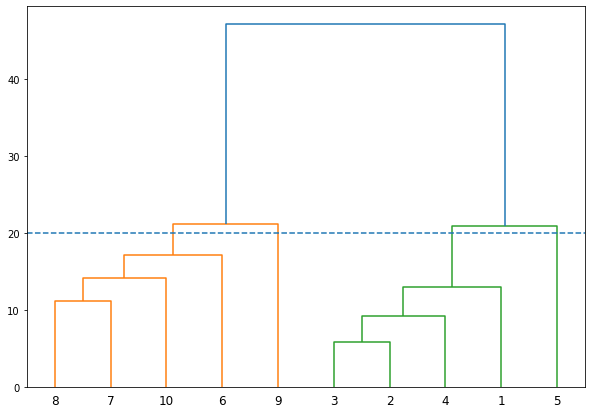

In [6]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.hlines(y= 20, xmin =0, xmax = 100, linestyles='dashed')
plt.show()

In the above plot, the horizontal line passes through four vertical lines resulting in four clusters: cluster of points 6,7,8 and 10, cluster of points 3,2,4 and points 9 and 5 will be treated as single point clusters.

## Hierarchical Clustering via Scikit-Learn
Enough of the theory, now let's apply hierarchical clustering using Python's Scikit-Learn library.

### Example 1
In our first example we will cluster the X numpy array of data points that we created in the previous section.

The process of clustering is similar to any other unsupervised machine learning algorithm. We start by importing the required libraries:

The next step is to import the class for clustering and call its fit_predict method to predict the clusters that each data point belongs to.

Take a look at the following script:

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In the code above we import the ```AgglomerativeClustering``` class from the ```sklearn.cluster``` library. The number of parameters is set to 2 using the ```n_clusters``` parameter while the ```affinity``` is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.

Next we call the ```fit_predict``` method from the ```AgglomerativeClustering``` class variable cluster. This method returns the names of the clusters that each data point belongs to. Execute the following script to see how the data points have been clustered.

The output is a one-dimensional array of 10 elements corresponding to the clusters assigned to our 10 data points.


In [8]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


As expected the first five points have been clustered together while the last five points have been clustered together. It is important to mention here that these ones and zeros are merely labels assigned to the clusters and have no mathematical implications.

Finally, let's plot our clusters. To do so, execute the following code:

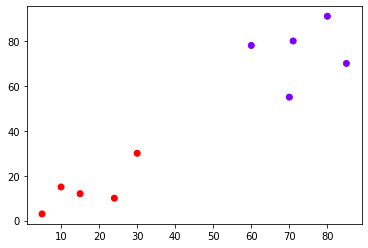

In [9]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


## Example 2 Karate Club

https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html

**DATASET** ZACHARY

**DESCRIPTION** Two 34×34 matrices.

        ZACHE symmetric, binary.

        ZACHC symmetric, valued.

**BACKGROUND** These are data collected from the members of a university karate club by Wayne Zachary. The ZACHE matrix represents the presence or absence of ties among the members of the club; the ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred).

Zachary (1977) used these data and an information flow model of network conflict resolution to explain the split-up of this group following disputes among the members.




In [10]:
import networkx as nx
from matplotlib import colors
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
plt.style.use('ggplot')


In [11]:
def draw_communities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the student and the value at the position is the student club membership.
        E.g. `print(membership[8]) --> 1` means that student #8 is a member of club 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    norm = colors.Normalize(vmin=0, vmax=len(club_dict.keys()))

    for club, members in club_dict.items():
        nx.draw_networkx(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=550,
                               alpha=0.8,
                               ax=ax, 
                               label=members)

    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [12]:
# True labels of the group each student (node) unded up in. Found via the original paper
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

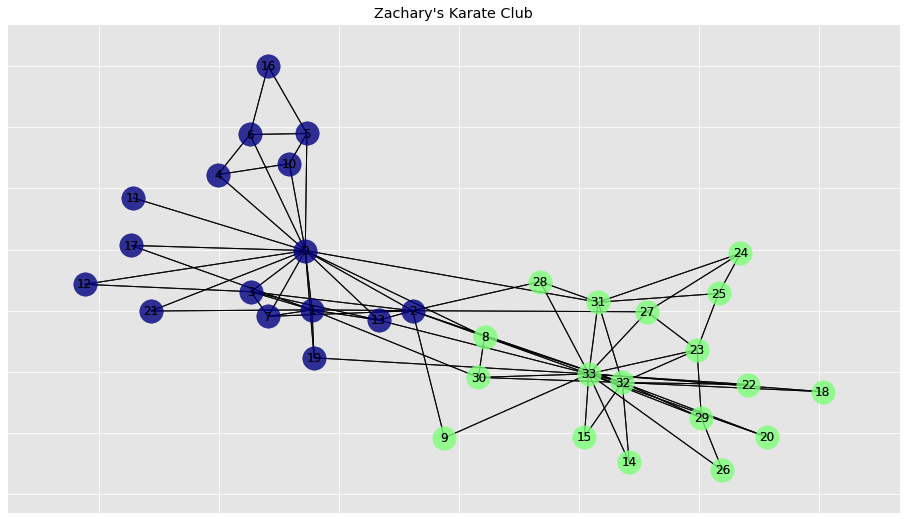

In [13]:
draw_communities(G, y_true, pos)


In [14]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explaination on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat

In [15]:
# Adjacency Matrix
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [16]:
k_clusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

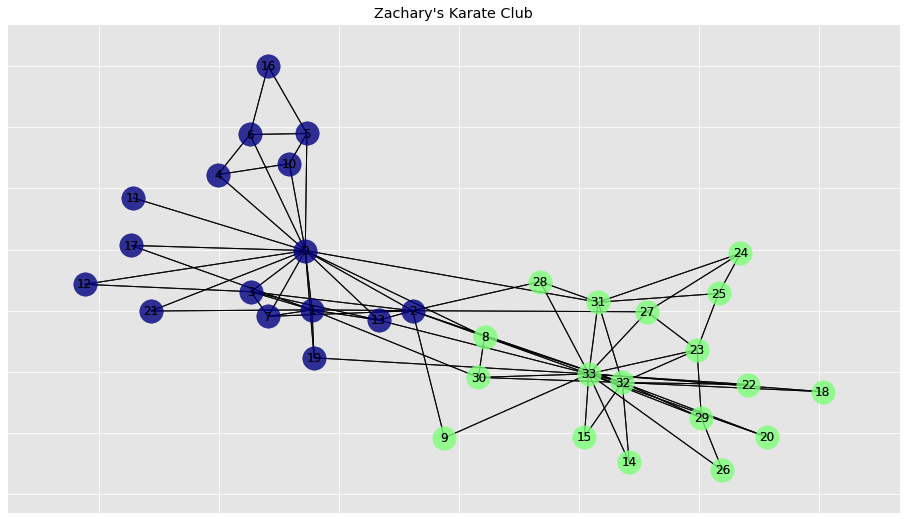

In [17]:
draw_communities(G, algorithms['agglom'].labels_, pos)


### Visualization of hierarchical clustering as a dendrogram

In [18]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,  **kwargs) # labels=model.labels_,

In [19]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(edge_mat)

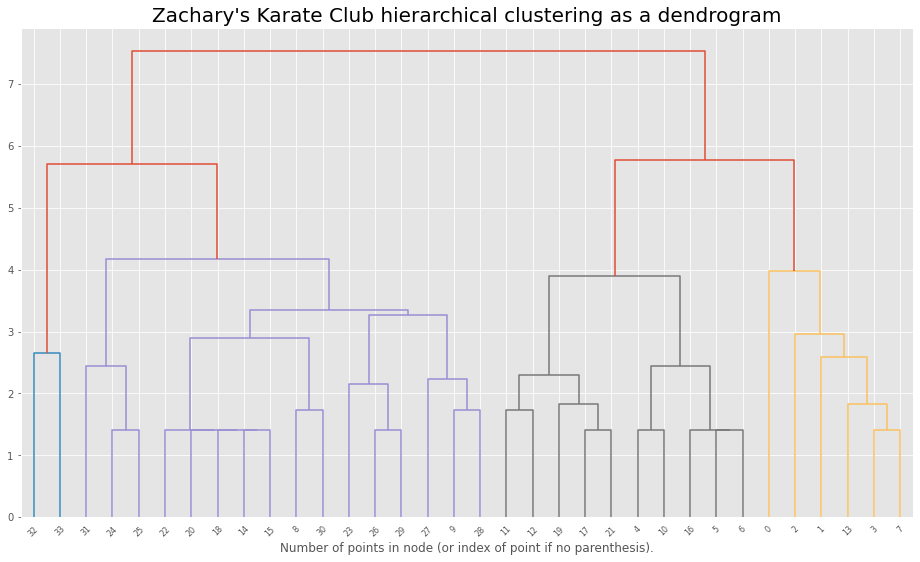

In [20]:
fig, ax = plt.subplots(figsize=(16,9))

plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title("Zachary's Karate Club hierarchical clustering as a dendrogram", fontsize=20)
plt.show()